<Axes: xlabel='body_mass_g', ylabel='is_gentoo'>

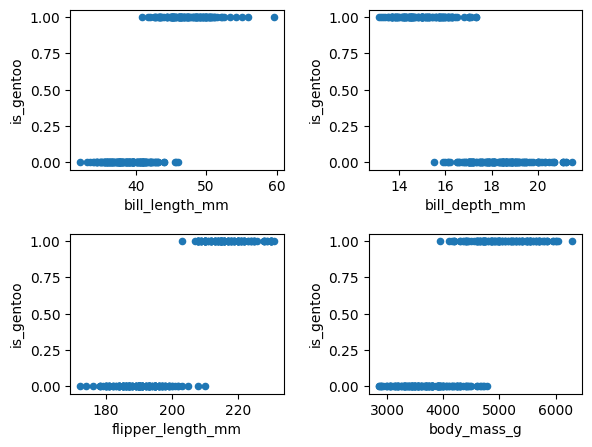

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv")
df["is_gentoo"] = df["species"].replace({"Gentoo": 1, "Adelie": 0})

# explore the data
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.4)

df.plot.scatter("bill_length_mm", "is_gentoo", ax=axes[0,0])
df.plot.scatter("bill_depth_mm", "is_gentoo", ax=axes[0,1])
df.plot.scatter("flipper_length_mm", "is_gentoo", ax=axes[1,0])
df.plot.scatter("body_mass_g", "is_gentoo", ax=axes[1,1])


Logistic Regression:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

# split into test/train
train, test = train_test_split(df, test_size=0.2)

X_train = train[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y_train = train["is_gentoo"].astype('int')

reg = LogisticRegression(max_iter=1000).fit(X_train.values, y_train)

X_test = test[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y_test = test["is_gentoo"].astype('int')

print("Score against training set:", reg.score(X_train.values, y_train))
print("Score against test set:", reg.score(X_test.values, y_test))

print("Prediction for 30mm, 19mm, 190mm, 3500g:", reg.predict([[30, 19, 190, 3500]]))
print("Prediction for 50mm, 13mm, 210mm, 5500g:", reg.predict([[50, 13, 210, 5500]]))

Score against training set: 1.0
Score against test set: 1.0
Prediction for 30mm, 19mm, 190mm, 3500g: [0]
Prediction for 50mm, 13mm, 210mm, 5500g: [1]


Decision Tree:

In [3]:
import xgboost as xgb

# convert into a format XGBoost likes
d_train = xgb.DMatrix(train._get_numeric_data(), label=y_train)
d_test = xgb.DMatrix(test._get_numeric_data(), label=y_test)

params = {
    'max_depth': 3,  # Maximum depth of each tree
    'learning_rate': 0.1,  # Learning rate to control the step size shrinkage
    'objective': 'multi:softmax',  # Specify the learning task and the corresponding learning objective
    'num_class': 2 # Number of classes in the dataset
}

num_rounds = 100
model = xgb.train(params, d_train, num_rounds)

predictions = model.predict(d_test)
correct = np.sum(predictions == y_test)
total = len(y_test)
accuracy = correct / total
print("Accuracy:", accuracy)


Accuracy: 1.0
